In [362]:
import pandas as pd
import scipy.stats as stats
import numpy as np

In [363]:
from statsmodels.stats.proportion import proportions_ztest

In [364]:
df = pd.read_csv("/Users/anasghonaim/Library/CloudStorage/OneDrive-Personal/Ironhack/Week 5/week5_6_project/data/cleaned/df_web_experiment_a.csv")
df

,client_id,visitor_id,visit_id,process_step,date_time,Variation,repeated_step,step_repeated,error_occurred,last_step,time_spent,confirmed
0,7179755,167765295_97487764427,264484508_5982901710_928530,5,2017-03-15 00:26:24,Control,0,0,False,5,416,True
1,4192640,692067844_75217592829,706721307_85347845958_18583,1,2017-03-15 00:44:38,Test,1,1,True,1,75,False
2,6752370,258848572_66112715827,147442660_10728929690_338280,1,2017-03-15 05:43:13,Test,1,1,True,1,338,False
3,9584408,748244138_48778380454,484298588_81471639218_981974,5,2017-03-15 06:16:08,Control,0,0,False,5,764,True
4,2685910,321566510_66607009808,538067801_99657933298_140950,1,2017-03-15 07:13:47,Test,1,1,True,1,60,False
...,...,...,...,...,...,...,...,...,...,...,...,...
69200,6800679,185313147_57950282409,401866349_68590569683_395732,1,2017-06-20 23:14:06,Test,0,0,False,1,0,False
69201,1545935,976873968_42239039722,10056419_61656665964_803695,5,2017-06-20 23:21:23,Test,0,0,False,5,457,True
69202,291330,992344309_24884468623,91879336_25502670457_529422,2,2017-06-20 23:21:41,Control,0,0,False,2,7,False
69203,1558312,397562195_28573798537,175513303_32086468382_224926,5,2017-06-20 23:26:00,Control,0,0,False,5,745,True


In [365]:
# Checking proportion of confirmed for each variation
proportion_table = pd.crosstab(df['Variation'], df['confirmed'], normalize='index') * 100
proportion_table

confirmed,False,True
Variation,,
Control,52.302857,47.697143
Test,42.318794,57.681206


In [366]:
# Checking proportion of confirmed for each variation
proportion_table = pd.crosstab(df['Variation'], df['confirmed'], normalize='index') * 100
proportion_table

confirmed,False,True
Variation,,
Control,52.302857,47.697143
Test,42.318794,57.681206


In [367]:
number_of_control = df[df['Variation'] == 'Control'].shape[0]
number_of_test = df[df['Variation'] == 'Test'].shape[0]
confirmed_control = df[(df['Variation'] == 'Control') & (df['confirmed'] == 1)].shape[0]
confirmed_test = df[(df['Variation'] == 'Test') & (df['confirmed'] == 1)].shape[0]

In [368]:
# ---- Hypothesis Testing ----

# H0: There is no difference in the confirmation rates between Control and Test groups
# H1: There is a difference in the confirmation rates between Control and Test groups
# Significance level: 0.05

successes = [confirmed_control, confirmed_test]
nobs = [number_of_control, number_of_test]

z_stat, p_value = proportions_ztest(successes, nobs)

z_stat, p_value

# We reject the null hypothesis since the p-value is less than 0.05. There is a difference in the confirmation rates between Control and Test groups.

(np.float64(-26.246725969243247), np.float64(7.79001741342961e-152))

In [369]:
# H0: Confirmation rate in the test group <= Confirmation rate in the control group
# H1: Confirmation rate in the test group > Confirmation rate in the control group
# Significance level: 0.05

successes = [confirmed_test, confirmed_control]
nobs = [number_of_test, number_of_control]
z_stat, p_value = proportions_ztest(successes, nobs, alternative='larger')

z_stat, p_value

# We reject the null hypothesis since the p-value is less than 0.05. The confirmation rate in the test group is higher than in the control group.

(np.float64(26.246725969243247), np.float64(3.895008706714805e-152))

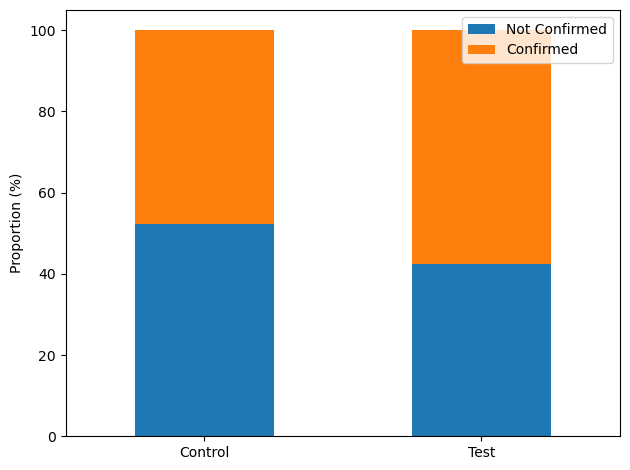

In [370]:
# Plotting the frequency table
# Remove xlabel for better visualization

import matplotlib.pyplot as plt
proportion_table.plot(kind='bar', stacked=True)
plt.ylabel('Proportion (%)')
plt.xlabel('')
plt.xticks(rotation=0)
plt.legend(labels=['Not Confirmed', 'Confirmed'])
plt.tight_layout()
plt.show()

In [371]:
# Checking proportion of confirmed for each variation
proportion_table = pd.crosstab(df['Variation'], df['error_occurred'], normalize='index') * 100
proportion_table

error_occurred,False,True
Variation,,
Control,63.957179,36.042821
Test,55.369426,44.630574


In [372]:
number_of_control = df[df['Variation'] == 'Control'].shape[0]
number_of_test = df[df['Variation'] == 'Test'].shape[0]
error_control = df[(df['Variation'] == 'Control') & (df['error_occurred'] == 1)].shape[0]
error_test = df[(df['Variation'] == 'Test') & (df['error_occurred'] == 1)].shape[0]

In [373]:
number_of_control, number_of_test, error_control, error_test

(32134, 37071, 11582, 16545)

In [374]:
# H0: error rates for control == error rates for test
# H1: error rates for control != error rates for test
# Significance level: 0.05

success = [error_control, error_test]
nobs = [number_of_control, number_of_test]
z_stat, p_value = proportions_ztest(success, nobs)
z_stat, p_value

# We reject the null hypothesis since the p-value is less than 0.05. There is a difference in error rates between Control and Test groups.

(np.float64(-22.939369589196325), np.float64(1.881359792349724e-116))

In [375]:
# H0: error rates for test >= error rates for control
# H1: error rates for test < error rates for control
# Significance level: 0.05

success = [error_test, error_control]
nobs = [number_of_test, number_of_control]
z_stat, p_value = proportions_ztest(success, nobs, alternative='smaller')
z_stat, p_value

# We reject the null hypothesis since the p-value is less than 0.05. The error rate in the test group is lower than in the control group.

(np.float64(22.939369589196325), np.float64(1.0))

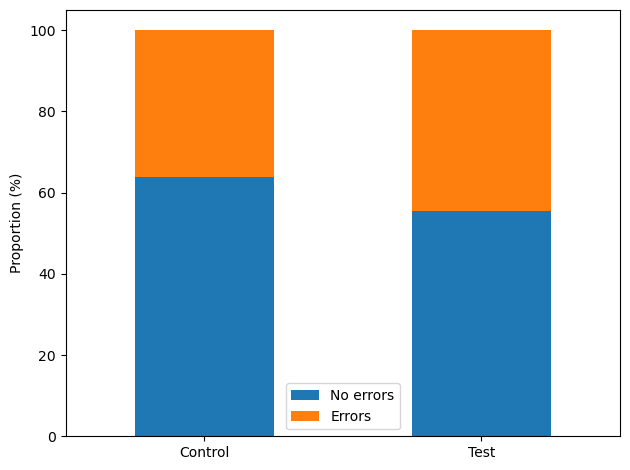

In [376]:
# Plotting the frequency table
import matplotlib.pyplot as plt
proportion_table.plot(kind='bar', stacked=True)
plt.xlabel('')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=0)
plt.legend(labels=['No errors', 'Errors'])
plt.tight_layout()
plt.show()

In [377]:
# H0: Error rate in test group == Error rate in control group
# H1: Error rate in test group != Error rate in control group
# Significance level: 0.05
success = [error_test, error_control]
nobs = [number_of_test, number_of_control]
z_stat, p_value = proportions_ztest(success, nobs)
z_stat, p_value

# We reject the null hypothesis since the p-value is less than 0.05. There is a difference in error rates between Control and Test groups.

(np.float64(22.939369589196325), np.float64(1.881359792349724e-116))

In [378]:
# H0: Error rate in control group >= Error rate in the test group
# H1: Error rate in the control group < Error rate in the test group
# Significance level: 0.05

success = [error_control, error_test]
nobs = [number_of_control, number_of_test]
z_stat, p_value = proportions_ztest(success, nobs, alternative='smaller')
z_stat, p_value

# We reject the null hypothesis since the p-value is less than 0.05. The error rate in the control group is lower than in the test group.

(np.float64(-22.939369589196325), np.float64(9.40679896174862e-117))

In [379]:
df_group_by_variation = df.groupby(['last_step','Variation'])['time_spent'].mean()
df_group_by_variation

last_step  Variation
1          Control      160.769007
           Test         255.202900
2          Control      192.532932
           Test         210.282526
3          Control      192.490048
           Test         251.196684
4          Control      318.221470
           Test         389.346089
5          Control      385.245188
           Test         359.041248
Name: time_spent, dtype: float64

In [380]:
df_group_by_variation_count = df.groupby(['last_step','Variation'])['time_spent'].mean()
df_group_by_variation_count

last_step  Variation
1          Control      160.769007
           Test         255.202900
2          Control      192.532932
           Test         210.282526
3          Control      192.490048
           Test         251.196684
4          Control      318.221470
           Test         389.346089
5          Control      385.245188
           Test         359.041248
Name: time_spent, dtype: float64

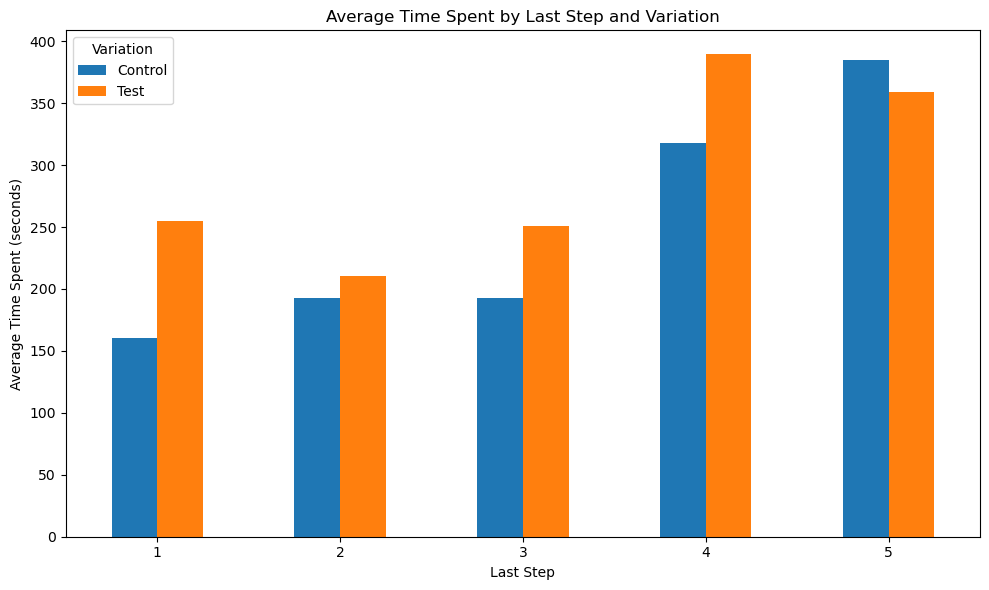

In [381]:
# visualize df_group_by_variation_count
import matplotlib.pyplot as plt
df_group_by_variation_count.unstack().plot(kind='bar', figsize=(10,6))
plt.title('Average Time Spent by Last Step and Variation')
plt.xlabel('Last Step')
plt.ylabel('Average Time Spent (seconds)')
plt.xticks(rotation=360)
plt.legend(title='Variation')
plt.tight_layout()
plt.show()


In [382]:
df

,client_id,visitor_id,visit_id,process_step,date_time,Variation,repeated_step,step_repeated,error_occurred,last_step,time_spent,confirmed
0,7179755,167765295_97487764427,264484508_5982901710_928530,5,2017-03-15 00:26:24,Control,0,0,False,5,416,True
1,4192640,692067844_75217592829,706721307_85347845958_18583,1,2017-03-15 00:44:38,Test,1,1,True,1,75,False
2,6752370,258848572_66112715827,147442660_10728929690_338280,1,2017-03-15 05:43:13,Test,1,1,True,1,338,False
3,9584408,748244138_48778380454,484298588_81471639218_981974,5,2017-03-15 06:16:08,Control,0,0,False,5,764,True
4,2685910,321566510_66607009808,538067801_99657933298_140950,1,2017-03-15 07:13:47,Test,1,1,True,1,60,False
...,...,...,...,...,...,...,...,...,...,...,...,...
69200,6800679,185313147_57950282409,401866349_68590569683_395732,1,2017-06-20 23:14:06,Test,0,0,False,1,0,False
69201,1545935,976873968_42239039722,10056419_61656665964_803695,5,2017-06-20 23:21:23,Test,0,0,False,5,457,True
69202,291330,992344309_24884468623,91879336_25502670457_529422,2,2017-06-20 23:21:41,Control,0,0,False,2,7,False
69203,1558312,397562195_28573798537,175513303_32086468382_224926,5,2017-06-20 23:26:00,Control,0,0,False,5,745,True


In [383]:
df_group_by_variation_count = df.groupby(['last_step','Variation'])['time_spent'].mean()
df_group_by_variation_count

last_step  Variation
1          Control      160.769007
           Test         255.202900
2          Control      192.532932
           Test         210.282526
3          Control      192.490048
           Test         251.196684
4          Control      318.221470
           Test         389.346089
5          Control      385.245188
           Test         359.041248
Name: time_spent, dtype: float64

In [384]:
df2 = pd.read_csv("/Users/anasghonaim/Library/CloudStorage/OneDrive-Personal/Ironhack/Week 5/week5_6_project/data/cleaned/df_web_experiment_steps.csv")    

In [385]:
df2

,client_id,visitor_id,visit_id,process_step,date_time,Variation,repeated_step,step_repeated
0,9988021,580560515_7732621733,781255054_21935453173_531117,4,2017-04-17 15:27:07,Test,1,4
1,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:26:51,Test,1,3
2,9988021,580560515_7732621733,781255054_21935453173_531117,4,2017-04-17 15:19:22,Test,1,4
3,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:13,Test,1,3
4,9988021,580560515_7732621733,781255054_21935453173_531117,4,2017-04-17 15:18:04,Test,1,4
...,...,...,...,...,...,...,...,...
317230,1574008,117364417_77840596075,528720790_71583064618_169151,1,2017-05-06 23:43:27,Test,0,0
317231,2908510,814969699_90652851448,562606085_36368381773_92090,1,2017-05-10 22:57:17,Control,1,1
317232,2908510,814969699_90652851448,562606085_36368381773_92090,3,2017-05-10 22:56:31,Control,0,0
317233,2908510,814969699_90652851448,562606085_36368381773_92090,2,2017-05-10 22:56:23,Control,0,0


In [386]:
import seaborn as sns
import matplotlib.pyplot as plt


errors = df2.groupby(['step_repeated', 'Variation'])['repeated_step'].count()
errors

step_repeated  Variation
0              Control      75455
               Test         85414
1              Control      28863
               Test         39597
2              Control      13782
               Test         21315
3              Control      11148
               Test         12859
4              Control       8338
               Test          7633
5              Control       2950
               Test          9881
Name: repeated_step, dtype: int64

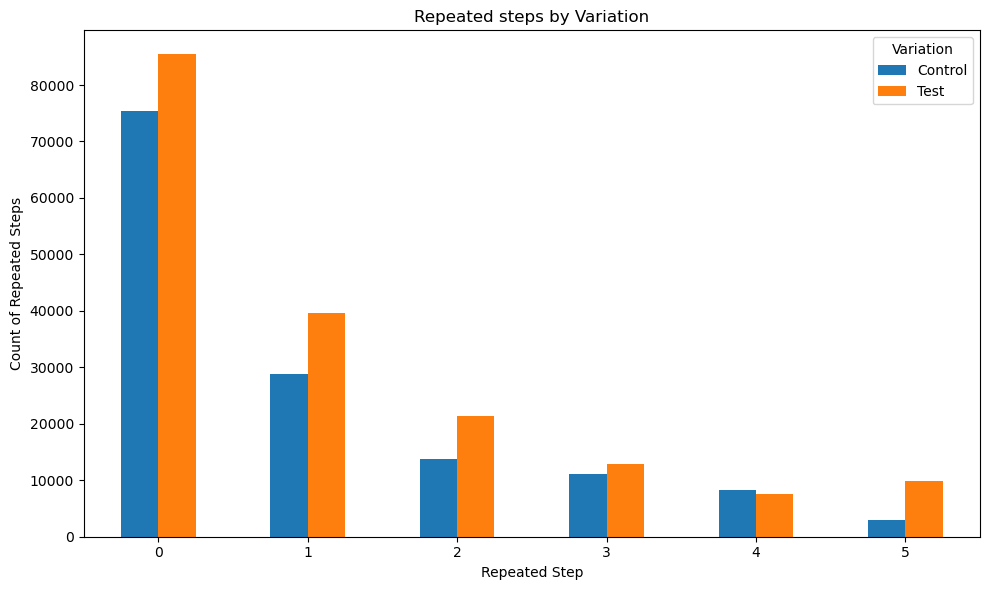

In [387]:
errors.unstack().plot(kind='bar', figsize=(10,6))
plt.title('Repeated steps by Variation')
plt.xlabel('Repeated Step')
plt.ylabel('Count of Repeated Steps')
plt.xticks(rotation=0)
plt.legend(title='Variation')
plt.tight_layout()
plt.show()


In [388]:
df1 = pd.read_csv("/Users/anasghonaim/Library/CloudStorage/OneDrive-Personal/Ironhack/Week 5/week5_6_project/data/cleaned/df_final_demo.csv")

In [389]:
df3 = pd.merge(df, df1, on="client_id", how="left")
df3

,client_id,visitor_id,visit_id,process_step,date_time,Variation,repeated_step,step_repeated,error_occurred,last_step,time_spent,confirmed,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,7179755,167765295_97487764427,264484508_5982901710_928530,5,2017-03-15 00:26:24,Control,0,0,False,5,416,True,28.0,343.0,67.5,M,3.0,352322.35,2.0,5.0
1,4192640,692067844_75217592829,706721307_85347845958_18583,1,2017-03-15 00:44:38,Test,1,1,True,1,75,False,14.0,174.0,54.0,M,2.0,97914.40,3.0,6.0
2,6752370,258848572_66112715827,147442660_10728929690_338280,1,2017-03-15 05:43:13,Test,1,1,True,1,338,False,38.0,464.0,22.0,M,2.0,56574.43,2.0,5.0
3,9584408,748244138_48778380454,484298588_81471639218_981974,5,2017-03-15 06:16:08,Control,0,0,False,5,764,True,7.0,87.0,48.5,U,2.0,71834.25,2.0,5.0
4,2685910,321566510_66607009808,538067801_99657933298_140950,1,2017-03-15 07:13:47,Test,1,1,True,1,60,False,12.0,149.0,57.5,F,2.0,135363.65,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69200,6800679,185313147_57950282409,401866349_68590569683_395732,1,2017-06-20 23:14:06,Test,0,0,False,1,0,False,15.0,189.0,46.0,M,3.0,158703.72,6.0,9.0
69201,1545935,976873968_42239039722,10056419_61656665964_803695,5,2017-06-20 23:21:23,Test,0,0,False,5,457,True,4.0,59.0,24.0,F,3.0,52280.32,5.0,8.0
69202,291330,992344309_24884468623,91879336_25502670457_529422,2,2017-06-20 23:21:41,Control,0,0,False,2,7,False,29.0,349.0,68.0,M,2.0,62155.41,6.0,9.0
69203,1558312,397562195_28573798537,175513303_32086468382_224926,5,2017-06-20 23:26:00,Control,0,0,False,5,745,True,23.0,276.0,64.0,F,2.0,27918.86,2.0,5.0


In [390]:
potential_categorical_from_numerical = df3.select_dtypes("number").loc[:, df3.select_dtypes("number").nunique() < 20]
df_categorical = pd.concat([df3.select_dtypes("object"), potential_categorical_from_numerical], axis=1)
df_numerical = df3.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [391]:
df_numerical.corr()

,client_id,time_spent,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,bal
client_id,1.000000,-0.006018,0.003225,0.002944,-0.004480,0.007431
time_spent,-0.006018,1.000000,0.003490,0.003844,0.070481,-0.001156
clnt_tenure_yr,0.003225,0.003490,1.000000,0.998995,0.320644,0.193579
clnt_tenure_mnth,0.002944,0.003844,0.998995,1.000000,0.320833,0.192744
clnt_age,-0.004480,0.070481,0.320644,0.320833,1.000000,0.187595
bal,0.007431,-0.001156,0.193579,0.192744,0.187595,1.000000


In [392]:
df3.isna().sum()

client_id            0
visitor_id           0
visit_id             0
process_step         0
date_time            0
Variation            0
repeated_step        0
step_repeated        0
error_occurred       0
last_step            0
time_spent           0
confirmed            0
clnt_tenure_yr      22
clnt_tenure_mnth    22
clnt_age            22
gendr               22
num_accts           22
bal                 22
calls_6_mnth        22
logons_6_mnth       22
dtype: int64

In [393]:
# P-value is lower than 0.05, we reject the null hypothesis. Therefore, there is a significant association between the variation and confirmation status.

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df3['Variation'], df3['confirmed'])
_, p_value, _, _ = chi2_contingency(contingency_table)
p_value

np.float64(9.521275564479852e-152)

In [394]:
# P-value is higher than 0.05, we fail to reject the null hypothesis. Therefore, there is no significant association between the age and confirmation status.

contingency_table_age = pd.crosstab(df3['clnt_age'], df3['confirmed'])
_, p_value_age, _, _ = chi2_contingency(contingency_table_age)
p_value_age

np.float64(0.0)

In [395]:
df = pd.read_csv(r"/Users/anasghonaim/Library/CloudStorage/OneDrive-Personal/Ironhack/Week 5/week5_6_project/data/cleaned/df_cleand_raw_m.csv")

# Cleaning the data
df["time_from_prev_step"].fillna(0, inplace=True)
df = df[df['Variation'].notna() & (df['Variation'] != "")]

# Remove first step (NaN duration)


# Remove outliers in time_from_prev_step
Q1 = df['time_from_prev_step'].quantile(0.25)
Q3 = df['time_from_prev_step'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['time_from_prev_step'] >= lower_bound) & (df['time_from_prev_step'] <= upper_bound)]


/var/folders/wc/048rx86x7bqbzmjn7nr46j_80000gn/T/ipykernel_1681/3445657792.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["time_from_prev_step"].fillna(0, inplace=True)


In [396]:
df_no_outliers

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,Variation,time_from_prev_step,time_from_start,num_steps,...,error_flag,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_group
5,5,555,402506806_56087378777,637149525_38041617439_716659,1,2017-04-15 12:57:56,Test,0,0,5,...,False,3.0,46.0,30.0,U,2.0,25454.66,2.0,6.0,25-34
6,6,555,402506806_56087378777,637149525_38041617439_716659,2,2017-04-15 12:58:03,Test,7,7,5,...,False,3.0,46.0,30.0,U,2.0,25454.66,2.0,6.0,25-34
7,7,555,402506806_56087378777,637149525_38041617439_716659,3,2017-04-15 12:58:35,Test,32,39,5,...,False,3.0,46.0,30.0,U,2.0,25454.66,2.0,6.0,25-34
8,8,555,402506806_56087378777,637149525_38041617439_716659,4,2017-04-15 13:00:14,Test,99,138,5,...,False,3.0,46.0,30.0,U,2.0,25454.66,2.0,6.0,25-34
9,9,555,402506806_56087378777,637149525_38041617439_716659,5,2017-04-15 13:00:34,Test,20,158,5,...,False,3.0,46.0,30.0,U,2.0,25454.66,2.0,6.0,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443886,443886,9999729,834634258_21862004160,870243567_56915814033_814203,5,2017-05-08 16:09:40,Test,21,75,5,...,False,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,25-34
443887,443887,9999729,604429154_69247391147,99583652_41711450505_426179,1,2017-04-05 13:40:49,Test,0,0,2,...,False,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,25-34
443888,443888,9999729,604429154_69247391147,99583652_41711450505_426179,2,2017-04-05 13:41:04,Test,15,15,2,...,False,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,25-34
443889,443889,9999832,145538019_54444341400,472154369_16714624241_585315,1,2017-05-16 16:46:03,Test,0,0,2,...,False,23.0,281.0,49.0,F,2.0,431887.61,1.0,4.0,45-54


In [397]:
# H0: Time spent in each step is the same for both variations
# H1: Time spent in each step is different for both variations
# Significance level: 0.05

for step in df_no_outliers['process_step'].unique():
    control_times = df_no_outliers[(df_no_outliers['Variation'] == 'Control') & (df_no_outliers['process_step'] == step)]['time_from_prev_step']
    test_times = df_no_outliers[(df_no_outliers['Variation'] == 'Test') & (df_no_outliers['process_step'] == step)]['time_from_prev_step']
    
    t_stat, p_value = stats.ttest_ind(control_times, test_times)
    print(f"Step {step} - t-statistic: {t_stat}, p-value: {p_value}")
    
    if p_value < 0.05:
        print(f"We reject the null hypothesis for step {step}. There is a difference in time spent between Control and Test groups.\n")
    else:
        print(f"We fail to reject the null hypothesis for step {step}. No difference in time spent between Control and Test groups.\n")

Step 1 - t-statistic: -30.405944978951332, p-value: 4.656943414709953e-202
We reject the null hypothesis for step 1. There is a difference in time spent between Control and Test groups.

Step 2 - t-statistic: 28.077273169576667, p-value: 2.0078171412534163e-172
We reject the null hypothesis for step 2. There is a difference in time spent between Control and Test groups.

Step 3 - t-statistic: -8.522846255153354, p-value: 1.5959495389828688e-17
We reject the null hypothesis for step 3. There is a difference in time spent between Control and Test groups.

Step 4 - t-statistic: -3.8725594922971682, p-value: 0.00010786276066965308
We reject the null hypothesis for step 4. There is a difference in time spent between Control and Test groups.

Step 5 - t-statistic: 33.610798742208125, p-value: 9.502802929727005e-244
We reject the null hypothesis for step 5. There is a difference in time spent between Control and Test groups.



In [398]:
# H0: Time spent in each step for test > Time spent in each step for control
# H1: Time spent in each step for test < Time spent in each step for control
# Significance level: 0.05

for step in df_no_outliers['process_step'].unique():
    control_times = df_no_outliers[(df_no_outliers['Variation'] == 'Control') & (df_no_outliers['process_step'] == step)]['time_from_prev_step']
    test_times = df_no_outliers[(df_no_outliers['Variation'] == 'Test') & (df_no_outliers['process_step'] == step)]['time_from_prev_step']

    t_stat, p_value = stats.ttest_ind(test_times, control_times, alternative='less')
    print(f"Step {step} - t-statistic: {t_stat}, p-value: {p_value}")
    
    if p_value < 0.05:
        print(f"We reject the null hypothesis for step {step}. Time spent in Test group is less than time spent in Control group.\n")
    else:
        print(f"We fail to reject the null hypothesis for step {step}. Time spent in Test group is greater than time spent in Control group.\n")

Step 1 - t-statistic: 30.405944978951332, p-value: 1.0
We fail to reject the null hypothesis for step 1. Time spent in Test group is greater than time spent in Control group.

Step 2 - t-statistic: -28.077273169576667, p-value: 1.0039085706267081e-172
We reject the null hypothesis for step 2. Time spent in Test group is less than time spent in Control group.

Step 3 - t-statistic: 8.522846255153354, p-value: 1.0
We fail to reject the null hypothesis for step 3. Time spent in Test group is greater than time spent in Control group.

Step 4 - t-statistic: 3.8725594922971682, p-value: 0.9999460686196652
We fail to reject the null hypothesis for step 4. Time spent in Test group is greater than time spent in Control group.

Step 5 - t-statistic: -33.610798742208125, p-value: 4.7514014648635024e-244
We reject the null hypothesis for step 5. Time spent in Test group is less than time spent in Control group.



In [399]:
df = pd.read_csv(r"/Users/anasghonaim/Library/CloudStorage/OneDrive-Personal/Ironhack/Week 5/week5_6_project/data/cleaned/df_cleand_raw_m.csv")

# Cleaning the data
df = df[df['Variation'].notna() & (df['Variation'] != "")]

# Remove first step (NaN duration)


# Remove outliers in time_from_prev_step
Q1 = df['time_from_prev_step'].quantile(0.25)
Q3 = df['time_from_prev_step'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['time_from_prev_step'] >= lower_bound) & (df['time_from_prev_step'] <= upper_bound)]
df_no_outliers

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,Variation,time_from_prev_step,time_from_start,num_steps,...,error_flag,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_group
5,5,555,402506806_56087378777,637149525_38041617439_716659,1,2017-04-15 12:57:56,Test,0,0,5,...,False,3.0,46.0,30.0,U,2.0,25454.66,2.0,6.0,25-34
6,6,555,402506806_56087378777,637149525_38041617439_716659,2,2017-04-15 12:58:03,Test,7,7,5,...,False,3.0,46.0,30.0,U,2.0,25454.66,2.0,6.0,25-34
7,7,555,402506806_56087378777,637149525_38041617439_716659,3,2017-04-15 12:58:35,Test,32,39,5,...,False,3.0,46.0,30.0,U,2.0,25454.66,2.0,6.0,25-34
8,8,555,402506806_56087378777,637149525_38041617439_716659,4,2017-04-15 13:00:14,Test,99,138,5,...,False,3.0,46.0,30.0,U,2.0,25454.66,2.0,6.0,25-34
9,9,555,402506806_56087378777,637149525_38041617439_716659,5,2017-04-15 13:00:34,Test,20,158,5,...,False,3.0,46.0,30.0,U,2.0,25454.66,2.0,6.0,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443886,443886,9999729,834634258_21862004160,870243567_56915814033_814203,5,2017-05-08 16:09:40,Test,21,75,5,...,False,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,25-34
443887,443887,9999729,604429154_69247391147,99583652_41711450505_426179,1,2017-04-05 13:40:49,Test,0,0,2,...,False,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,25-34
443888,443888,9999729,604429154_69247391147,99583652_41711450505_426179,2,2017-04-05 13:41:04,Test,15,15,2,...,False,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,25-34
443889,443889,9999832,145538019_54444341400,472154369_16714624241_585315,1,2017-05-16 16:46:03,Test,0,0,2,...,False,23.0,281.0,49.0,F,2.0,431887.61,1.0,4.0,45-54


In [400]:
df_no_outliers

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,Variation,time_from_prev_step,time_from_start,num_steps,...,error_flag,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_group
5,5,555,402506806_56087378777,637149525_38041617439_716659,1,2017-04-15 12:57:56,Test,0,0,5,...,False,3.0,46.0,30.0,U,2.0,25454.66,2.0,6.0,25-34
6,6,555,402506806_56087378777,637149525_38041617439_716659,2,2017-04-15 12:58:03,Test,7,7,5,...,False,3.0,46.0,30.0,U,2.0,25454.66,2.0,6.0,25-34
7,7,555,402506806_56087378777,637149525_38041617439_716659,3,2017-04-15 12:58:35,Test,32,39,5,...,False,3.0,46.0,30.0,U,2.0,25454.66,2.0,6.0,25-34
8,8,555,402506806_56087378777,637149525_38041617439_716659,4,2017-04-15 13:00:14,Test,99,138,5,...,False,3.0,46.0,30.0,U,2.0,25454.66,2.0,6.0,25-34
9,9,555,402506806_56087378777,637149525_38041617439_716659,5,2017-04-15 13:00:34,Test,20,158,5,...,False,3.0,46.0,30.0,U,2.0,25454.66,2.0,6.0,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443886,443886,9999729,834634258_21862004160,870243567_56915814033_814203,5,2017-05-08 16:09:40,Test,21,75,5,...,False,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,25-34
443887,443887,9999729,604429154_69247391147,99583652_41711450505_426179,1,2017-04-05 13:40:49,Test,0,0,2,...,False,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,25-34
443888,443888,9999729,604429154_69247391147,99583652_41711450505_426179,2,2017-04-05 13:41:04,Test,15,15,2,...,False,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,25-34
443889,443889,9999832,145538019_54444341400,472154369_16714624241_585315,1,2017-05-16 16:46:03,Test,0,0,2,...,False,23.0,281.0,49.0,F,2.0,431887.61,1.0,4.0,45-54


In [401]:
df_no_outliers

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,Variation,time_from_prev_step,time_from_start,num_steps,...,error_flag,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_group
5,5,555,402506806_56087378777,637149525_38041617439_716659,1,2017-04-15 12:57:56,Test,0,0,5,...,False,3.0,46.0,30.0,U,2.0,25454.66,2.0,6.0,25-34
6,6,555,402506806_56087378777,637149525_38041617439_716659,2,2017-04-15 12:58:03,Test,7,7,5,...,False,3.0,46.0,30.0,U,2.0,25454.66,2.0,6.0,25-34
7,7,555,402506806_56087378777,637149525_38041617439_716659,3,2017-04-15 12:58:35,Test,32,39,5,...,False,3.0,46.0,30.0,U,2.0,25454.66,2.0,6.0,25-34
8,8,555,402506806_56087378777,637149525_38041617439_716659,4,2017-04-15 13:00:14,Test,99,138,5,...,False,3.0,46.0,30.0,U,2.0,25454.66,2.0,6.0,25-34
9,9,555,402506806_56087378777,637149525_38041617439_716659,5,2017-04-15 13:00:34,Test,20,158,5,...,False,3.0,46.0,30.0,U,2.0,25454.66,2.0,6.0,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443886,443886,9999729,834634258_21862004160,870243567_56915814033_814203,5,2017-05-08 16:09:40,Test,21,75,5,...,False,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,25-34
443887,443887,9999729,604429154_69247391147,99583652_41711450505_426179,1,2017-04-05 13:40:49,Test,0,0,2,...,False,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,25-34
443888,443888,9999729,604429154_69247391147,99583652_41711450505_426179,2,2017-04-05 13:41:04,Test,15,15,2,...,False,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,25-34
443889,443889,9999832,145538019_54444341400,472154369_16714624241_585315,1,2017-05-16 16:46:03,Test,0,0,2,...,False,23.0,281.0,49.0,F,2.0,431887.61,1.0,4.0,45-54


In [402]:
# testing whether older clients among both variations take more time (time_spent) to complete the process than younger clients
df = pd.read_csv("/Users/anasghonaim/Library/CloudStorage/OneDrive-Personal/Ironhack/Week 5/week5_6_project/data/cleaned/df_web_experiment_a.csv")
df1 = pd.read_csv("/Users/anasghonaim/Library/CloudStorage/OneDrive-Personal/Ironhack/Week 5/week5_6_project/data/cleaned/df_final_demo.csv")
df = pd.merge(df, df1, on="client_id", how="left")


# Remove outliers in time_spent
Q1 = df['time_spent'].quantile(0.25)
Q3 = df['time_spent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['time_spent'] >= lower_bound) & (df['time_spent'] <= upper_bound)]
df

,client_id,visitor_id,visit_id,process_step,date_time,Variation,repeated_step,step_repeated,error_occurred,last_step,time_spent,confirmed,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,7179755,167765295_97487764427,264484508_5982901710_928530,5,2017-03-15 00:26:24,Control,0,0,False,5,416,True,28.0,343.0,67.5,M,3.0,352322.35,2.0,5.0
1,4192640,692067844_75217592829,706721307_85347845958_18583,1,2017-03-15 00:44:38,Test,1,1,True,1,75,False,14.0,174.0,54.0,M,2.0,97914.40,3.0,6.0
2,6752370,258848572_66112715827,147442660_10728929690_338280,1,2017-03-15 05:43:13,Test,1,1,True,1,338,False,38.0,464.0,22.0,M,2.0,56574.43,2.0,5.0
3,9584408,748244138_48778380454,484298588_81471639218_981974,5,2017-03-15 06:16:08,Control,0,0,False,5,764,True,7.0,87.0,48.5,U,2.0,71834.25,2.0,5.0
4,2685910,321566510_66607009808,538067801_99657933298_140950,1,2017-03-15 07:13:47,Test,1,1,True,1,60,False,12.0,149.0,57.5,F,2.0,135363.65,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69200,6800679,185313147_57950282409,401866349_68590569683_395732,1,2017-06-20 23:14:06,Test,0,0,False,1,0,False,15.0,189.0,46.0,M,3.0,158703.72,6.0,9.0
69201,1545935,976873968_42239039722,10056419_61656665964_803695,5,2017-06-20 23:21:23,Test,0,0,False,5,457,True,4.0,59.0,24.0,F,3.0,52280.32,5.0,8.0
69202,291330,992344309_24884468623,91879336_25502670457_529422,2,2017-06-20 23:21:41,Control,0,0,False,2,7,False,29.0,349.0,68.0,M,2.0,62155.41,6.0,9.0
69203,1558312,397562195_28573798537,175513303_32086468382_224926,5,2017-06-20 23:26:00,Control,0,0,False,5,745,True,23.0,276.0,64.0,F,2.0,27918.86,2.0,5.0


In [403]:
# Testing whether clients over 50 years old take more time in each visit (visit_id) than clients under 50 years old

older_clients = df[df['clnt_age'] > 50]['time_spent']
younger_clients = df[df['clnt_age'] <= 50]['time_spent']

# H0: Timespent for clients older than 50 == Timespent for clients younger than or equal to 50
# H1: Timespent for clients older than 50 > Timespent for clients younger than

t_stat, p_value = stats.ttest_ind(older_clients, younger_clients)
t_stat, p_value

# We reject the null hypothesis since the p-value is less than 0.05. Therefore, clients over 50 years old take more time in each visit than clients under 50 years old.

(np.float64(18.54449858282827), np.float64(1.4367988200234707e-76))

In [404]:
# H0: Timespent by older clients <= Timespent by younger clients
# H1: Timespent by older clients > Timespent by younger clients
# Significance level: 0.05

t_stat, p_value = stats.ttest_ind(older_clients, younger_clients, alternative='greater')
t_stat, p_value

# We reject the null hypothesis since the p-value is less than 0.05. Therefore, clients over 50 years old take more time in each visit than clients under 50 years old.

(np.float64(18.54449858282827), np.float64(7.183994100117353e-77))

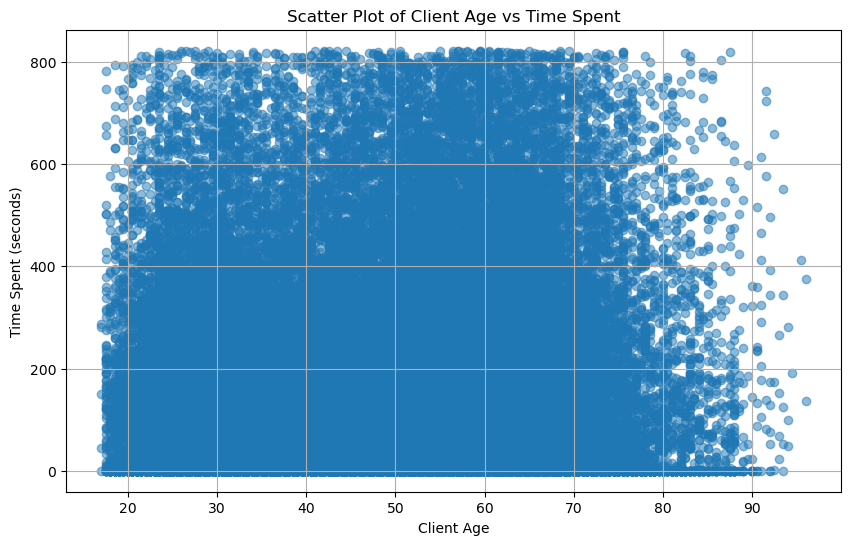

In [405]:
# Create scatter plot for clnt_age vs time_spent
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df['clnt_age'], df['time_spent'], alpha=0.5)
plt.title('Scatter Plot of Client Age vs Time Spent')
plt.xlabel('Client Age')
plt.ylabel('Time Spent (seconds)')
plt.grid()
plt.show()

In [406]:
# Hypothesis testing for time spent by olrder clients in test group vs older clients in control group
older_clients_test = df[(df['clnt_age'] > 50) & (df['Variation'] == 'Test')]['time_spent']
older_clients_control = df[(df['clnt_age'] > 50) & (df['Variation'] == 'Control')]['time_spent']

# H0: Timespent by older clients in test group <= Timespent by older clients in control group
# H1: Timespent by older clients in test group > Timespent by older clients in control group
# Significance level: 0.05

t_stat, p_value = stats.ttest_ind(older_clients_test, older_clients_control, alternative='greater')
t_stat, p_value

# We reject the null hypothesis since the p-value is less than 0.05. Therefore, older clients in the test group take more time in each visit than older clients in the control group.

(np.float64(5.8054993182237045), np.float64(3.2400892063413625e-09))

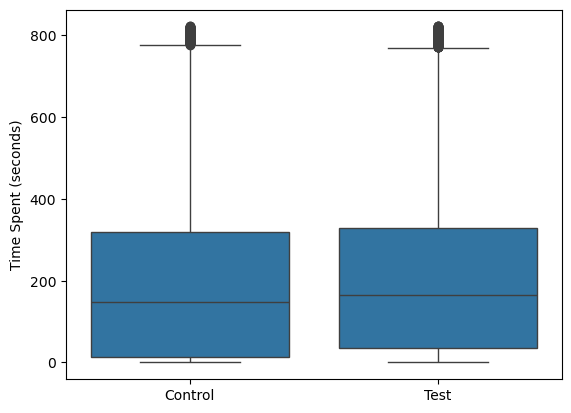

In [407]:
# Plotting difference in time spent between older clients in test and control groups. 
# Test and control groups for clients older than 50

import seaborn as sns
sns.boxplot(x='Variation', y='time_spent', data=df[df['clnt_age'] > 50])
plt.xlabel('')
plt.ylabel('Time Spent (seconds)')
plt.show()

In [408]:
# Hypothesis testing older clients vs younger clients in test group
older_clients = df[(df['clnt_age'] > 50) & (df['Variation'] == 'Test')]['time_spent']
younger_clients = df[(df['clnt_age'] <= 50) & (df['Variation'] == 'Test')]['time_spent']
# H0: Timespent by older clients <= Timespent by younger clients
# H1: Timespent by older clients > Timespent by younger clients
# Significance level: 0.05

t_stat, p_value = stats.ttest_ind(older_clients, younger_clients, alternative='greater')
t_stat, p_value

# We reject the null hypothesis since the p-value is less than 0.05. Therefore, clients over 50 years old take more time in each visit than clients under 50 years old.

(np.float64(16.008164059962976), np.float64(9.09416306795931e-58))

In [409]:
df = pd.read_csv(r"/Users/anasghonaim/Library/CloudStorage/OneDrive-Personal/Ironhack/Week 5/week5_6_project/data/cleaned/df_cleand_raw_m.csv")
df

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,Variation,time_from_prev_step,time_from_start,num_steps,...,error_flag,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_group
0,0,169,201385055_71273495308,749567106_99161211863_557568,1,2017-04-12 20:19:36,NaN,0,0,5,...,False,21.0,262.0,48.0,M,2.0,501570.72,4.0,4.0,45-54
1,1,169,201385055_71273495308,749567106_99161211863_557568,2,2017-04-12 20:19:45,NaN,9,9,5,...,False,21.0,262.0,48.0,M,2.0,501570.72,4.0,4.0,45-54
2,2,169,201385055_71273495308,749567106_99161211863_557568,3,2017-04-12 20:20:31,NaN,46,55,5,...,False,21.0,262.0,48.0,M,2.0,501570.72,4.0,4.0,45-54
3,3,169,201385055_71273495308,749567106_99161211863_557568,4,2017-04-12 20:22:05,NaN,94,149,5,...,False,21.0,262.0,48.0,M,2.0,501570.72,4.0,4.0,45-54
4,4,169,201385055_71273495308,749567106_99161211863_557568,5,2017-04-12 20:23:09,NaN,64,213,5,...,False,21.0,262.0,48.0,M,2.0,501570.72,4.0,4.0,45-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443892,443892,9999839,948322592_28990736246,715530422_68620416793_515645,1,2017-03-29 12:11:32,NaN,157,157,6,...,False,13.0,160.0,28.0,F,2.0,67425.35,3.0,3.0,25-34
443893,443893,9999839,948322592_28990736246,715530422_68620416793_515645,2,2017-03-29 12:11:35,NaN,3,160,6,...,False,13.0,160.0,28.0,F,2.0,67425.35,3.0,3.0,25-34
443894,443894,9999839,948322592_28990736246,715530422_68620416793_515645,3,2017-03-29 12:11:50,NaN,15,175,6,...,False,13.0,160.0,28.0,F,2.0,67425.35,3.0,3.0,25-34
443895,443895,9999839,948322592_28990736246,715530422_68620416793_515645,4,2017-03-29 12:12:28,NaN,38,213,6,...,False,13.0,160.0,28.0,F,2.0,67425.35,3.0,3.0,25-34


In [410]:
# Add error flag to all steps of the same visitor_id
df['error_flag'] = df.groupby('visitor_id')['error_flag'].transform('max')

# Keep last step for each visitor_id
df = df.sort_values(by=['visitor_id', 'process_step']).drop_duplicates(subset=['visitor_id'], keep='last')
df

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,Variation,time_from_prev_step,time_from_start,num_steps,...,error_flag,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_group
277976,277976,6265388,100019786_4272121951,703380671_89376183829_330646,5,2017-04-15 15:16:47,Test,29,194,6,...,False,7.0,94.0,42.0,U,4.0,214896.60,5.0,8.0,35-44
103189,103189,2340487,100026388_52569174348,560716384_55516231568_734638,5,2017-06-09 18:41:43,Test,49,236,9,...,True,4.0,59.0,31.0,U,2.0,30718.20,1.0,4.0,25-34
34119,34119,762846,10008560_69050398598,312355704_26376649868_97900,5,2017-04-15 22:56:27,Control,37,86,5,...,True,14.0,172.0,64.0,M,2.0,340335.52,6.0,9.0,55-64
62711,62711,1434609,100090034_17227185735,570380524_43053730472_296858,3,2017-04-04 15:53:39,Test,20,162,5,...,True,6.0,75.0,48.0,F,3.0,76174.76,6.0,9.0,45-54
250782,250782,5665278,100120667_10952149000,229897790_94515565093_1603,5,2017-04-09 16:35:46,Control,44,196,5,...,False,12.0,147.0,50.0,M,2.0,55008.39,1.0,4.0,45-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26790,26790,598498,999986924_89514756905,958181024_15313447104_158039,5,2017-05-09 08:17:33,Test,24,24,2,...,False,3.0,37.0,88.0,F,4.0,409437.62,6.0,9.0,65+
344445,344445,7732650,999993887_42794242929,984713970_16296160997_920979,1,2017-05-15 12:53:27,Control,0,0,1,...,False,8.0,98.0,44.0,F,2.0,159667.95,1.0,4.0,35-44
34764,34764,779389,999995931_60089148022,404770421_68000209065_385549,5,2017-04-05 12:26:07,Control,30,233,7,...,True,10.0,124.0,48.0,F,2.0,86315.14,5.0,8.0,45-54
256825,256825,5802950,999997533_50295491521,826796236_36192047424_492842,5,2017-04-13 07:41:14,Test,0,0,1,...,False,6.0,81.0,42.0,U,2.0,26014.74,5.0,8.0,35-44


In [411]:
# Checking proportion of confirmed for each variation
proportion_table = pd.crosstab(df['Variation'], df['error_flag'], normalize='index') * 100
proportion_table

error_flag,False,True
Variation,,
Control,75.602283,24.397717
Test,68.404960,31.595040


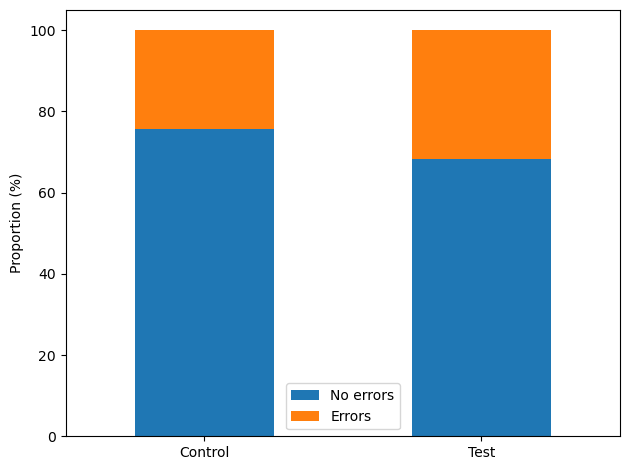

In [412]:
# Stacked bar plot of error proportions by variation with no error on the bottom
import seaborn as sns
import matplotlib.pyplot as plt

proportion_table.plot(kind='bar', stacked=True)
plt.ylabel('Proportion (%)')
plt.xlabel('')
plt.xticks(rotation=0)
plt.legend(labels=['No errors', 'Errors'])
plt.tight_layout()
plt.show()

In [413]:
number_of_control = df[df['Variation'] == 'Control'].shape[0]
number_of_test = df[df['Variation'] == 'Test'].shape[0]
error_control = df[(df['Variation'] == 'Control') & (df['error_flag'] == 1)].shape[0]
error_test = df[(df['Variation'] == 'Test') & (df['error_flag'] == 1)].shape[0]

In [414]:
# H0: Error rate in test group == Error rate in control group
# H1: Error rate in test group != Error rate in control group
# Significance level: 0.05
success = [error_test, error_control]
nobs = [number_of_test, number_of_control]
z_stat, p_value = proportions_ztest(success, nobs)
z_stat, p_value

# We reject the null hypothesis since the p-value is less than 0.05. There is a difference in error rates between Control and Test groups.

(np.float64(18.8567190204989), np.float64(2.5878896910492475e-79))

In [415]:
# H0: error rates for test >= error rates for control
# H1: error rates for test < error rates for control
# Significance level: 0.05

success = [error_test, error_control]
nobs = [number_of_test, number_of_control]
z_stat, p_value = proportions_ztest(success, nobs, alternative='smaller')
z_stat, p_value

# We reject the null hypothesis since the p-value is less than 0.05. The error rate in the test group is lower than in the control group.

(np.float64(18.8567190204989), np.float64(1.0))